# Exploration of AdClick data

https://www.kaggle.com/c/kddcup2012-track2

This analysis is performed using 100_000 observations sample from the whole dataset (consisting of 80 million observations).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt; plt.style.use("fivethirtyeight")
import seaborn as sns
from scipy.stats import zipf
from collections import Counter

In [2]:
data = pd.read_csv("data/D100k.tsv", sep="\t")

In [3]:
data.head()

,Click,DisplayURL,AdId,AdvertiserId,Depth,Position,UserID,Gender,Age,AdKeyword_tokens,AdTitle_tokens,AdDescription_tokens,Query_tokens
0,0,4298118681424644510,7686695,385,3,3,490234,1,3,4133|95|17,4133|95|17|0|4732|95|146|4079,8|81|123|205|2|95|26|95|60|32|1|17|146|1|991|3...,4133
1,0,13677630321509009335,3517124,23778,3,1,490234,1,3,4133,145|65|3927|832|93,3683|4990|2793|11589|21|10741|26|16044|26|3168...,4133
2,0,11689327222955583742,21021375,27701,3,2,490234,1,3,4133,4133|95|1|339|125|21|83093,726|50|2218|1533|2275|4133|1299|509|95|2072|1|...,4133
3,0,4298118681424644510,7686695,385,1,1,16960371,2,2,4133|95|17,4133|95|17|0|4732|95|146|4079,8|81|123|205|2|95|26|95|60|32|1|17|146|1|991|3...,4133|4942
4,0,15132506310926074459,4424000,20940,1,1,3524325,1,3,121|4133|95,121|4133|95|8762|3957|4563|2233|192|28|138|3,62|1162|570|8|4133|95|1|81|102|1155|650|1255|1...,4133|4942


## Data exploration 

In [4]:
data.columns

Index(['Click', 'DisplayURL', 'AdId', 'AdvertiserId', 'Depth', 'Position',
       'UserID', 'Gender', 'Age', 'AdKeyword_tokens', 'AdTitle_tokens',
       'AdDescription_tokens', 'Query_tokens'],
      dtype='object')

In [5]:
data.dtypes

Click                    int64
DisplayURL              uint64
AdId                     int64
AdvertiserId             int64
Depth                    int64
Position                 int64
UserID                   int64
Gender                   int64
Age                      int64
AdKeyword_tokens        object
AdTitle_tokens          object
AdDescription_tokens    object
Query_tokens            object
dtype: object

---
### Numerical values
Click is the target variable

In [6]:
data[["Click", "Depth", "Position", "Gender", "Age"]].describe()

,Click,Depth,Position,Gender,Age
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,0.049110,1.898500,1.45674,1.435130,3.166080
std,0.216099,0.695804,0.61723,0.532273,1.414503
min,0.000000,1.000000,1.00000,0.000000,1.000000
25%,0.000000,1.000000,1.00000,1.000000,2.000000
50%,0.000000,2.000000,1.00000,1.000000,3.000000
75%,0.000000,2.000000,2.00000,2.000000,4.000000
max,1.000000,3.000000,3.00000,2.000000,6.000000


In [7]:
data.dtypes

Click                    int64
DisplayURL              uint64
AdId                     int64
AdvertiserId             int64
Depth                    int64
Position                 int64
UserID                   int64
Gender                   int64
Age                      int64
AdKeyword_tokens        object
AdTitle_tokens          object
AdDescription_tokens    object
Query_tokens            object
dtype: object

---
### Text values

In [24]:
text_column = "AdDescription_tokens"
text = data[text_column].str.split("|")

In [25]:
text

0        [8, 81, 123, 205, 2, 95, 26, 95, 60, 32, 1, 17...
1        [3683, 4990, 2793, 11589, 21, 10741, 26, 16044...
2        [726, 50, 2218, 1533, 2275, 4133, 1299, 509, 9...
3        [8, 81, 123, 205, 2, 95, 26, 95, 60, 32, 1, 17...
4        [62, 1162, 570, 8, 4133, 95, 1, 81, 102, 1155,...
                               ...                        
99995    [13327, 99, 128, 494, 2928, 21, 26500, 10, 117...
99996    [13327, 99, 128, 494, 2928, 21, 26500, 10, 117...
99997    [13327, 99, 128, 494, 2928, 21, 26500, 10, 117...
99998    [13327, 99, 128, 494, 2928, 21, 26500, 10, 117...
99999    [13327, 99, 128, 494, 2928, 21, 26500, 10, 117...
Name: AdDescription_tokens, Length: 100000, dtype: object

Average length of a text

In [10]:
np.mean([len(tokens) for tokens in text.values])

21.45683

In [11]:
all_words = []
for words in text.values:
    all_words.extend(words)

In [12]:
len(all_words)

2145683

In [13]:
all_words_count = {k: v for k, v in sorted(Counter(all_words).items(), key=lambda item: item[1], reverse=True)}  # word : count dictionary of all words ordered by count
all_words_count_values = np.array([v for k, v in all_words_count.items()])
all_words_count_values

array([222734,  78059,  35014, ...,      1,      1,      1])

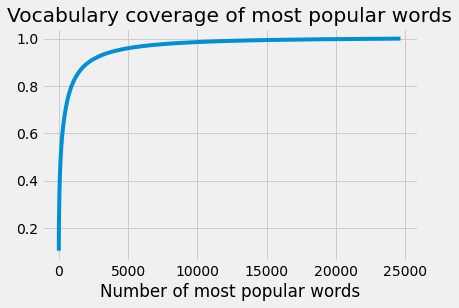

In [14]:
plt.plot(np.cumsum(all_words_count_values) / np.sum(all_words_count_values))
plt.xlabel("Number of most popular words")
plt.title("Vocabulary coverage of most popular words");

In [15]:
np.cumsum(all_words_count_values)[5000] / np.sum(all_words_count_values)

0.9594641892581522

We observe highly concave function. Only 5000 words are sufficient to cover 88% of add description tokens.

#### Zipf's law 
Let's check the probability distribution for most popular words

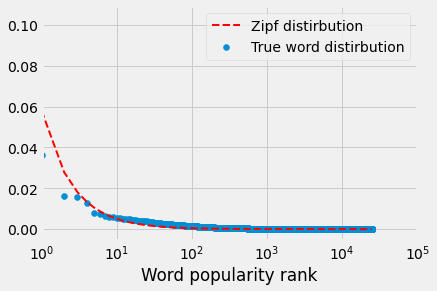

In [16]:
plt.scatter(np.arange(len(all_words_count_values)), all_words_count_values / np.sum(all_words_count_values), label="True word distirbution")

x_values = np.arange(1, len(all_words_count_values) + 1)
zipf_pmf = zipf.pmf(x_values, 1.06)
plt.plot(x_values, zipf_pmf, c="red", linestyle="--", linewidth=2, label="Zipf distirbution")
plt.xscale("log")
plt.xlim((1, 1e5))
plt.legend()
plt.xlabel("Word popularity rank");

#### Summary for all text columns

AdKeyword_tokens
Average length of AdKeyword_tokens: 2.09
95% quantile of length: 4.0
Number of unique words in AdKeyword_tokens: 10798


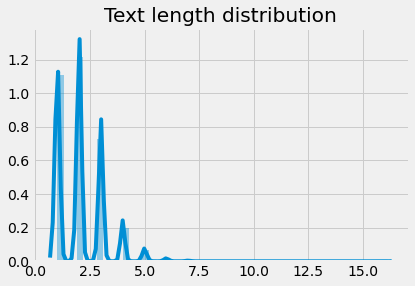

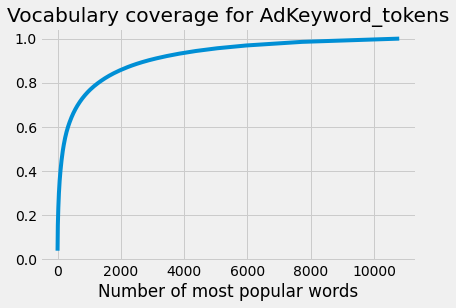

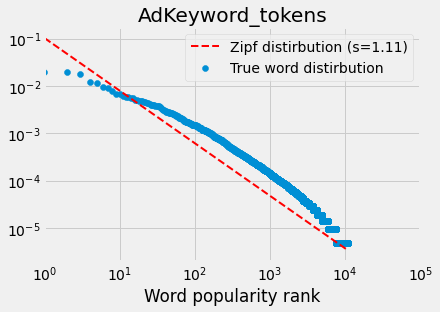


AdTitle_tokens
Average length of AdTitle_tokens: 8.85
95% quantile of length: 14.0
Number of unique words in AdTitle_tokens: 16918


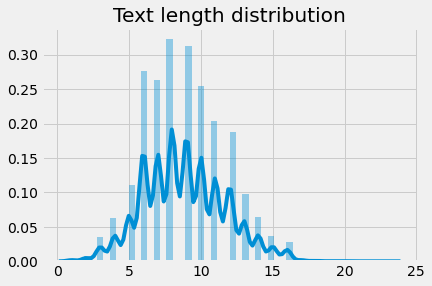

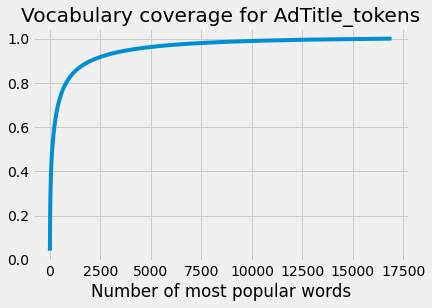

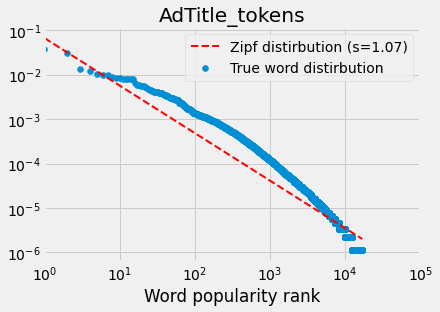


AdDescription_tokens
Average length of AdDescription_tokens: 21.46
95% quantile of length: 29.0
Number of unique words in AdDescription_tokens: 24671


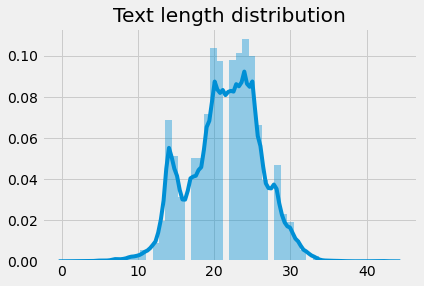

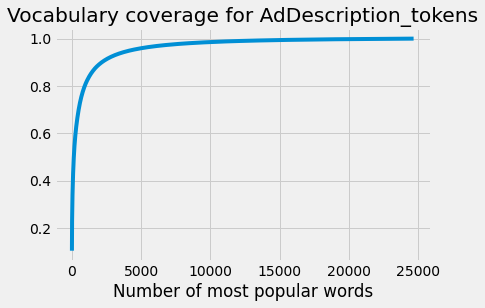

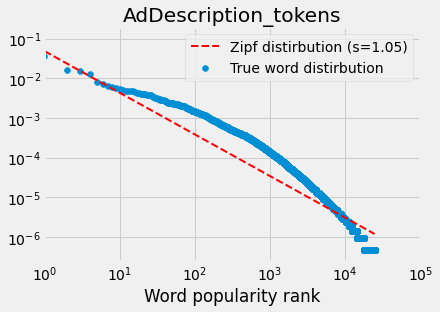


Query_tokens
Average length of Query_tokens: 2.92
95% quantile of length: 6.0
Number of unique words in Query_tokens: 18848


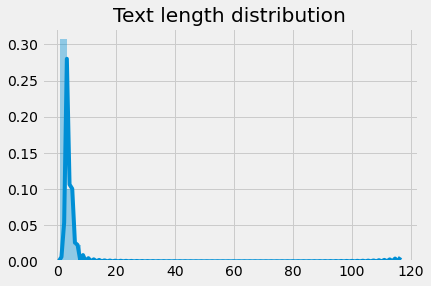

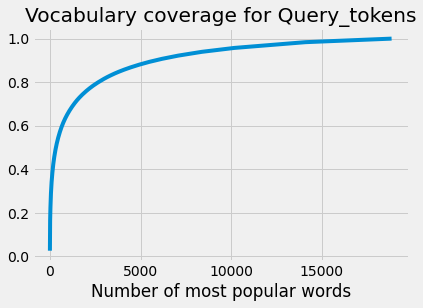

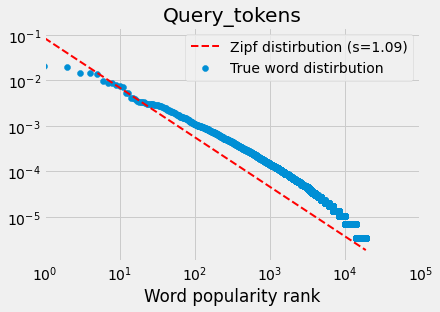

In [17]:
text_columns = ["AdKeyword_tokens", "AdTitle_tokens", "AdDescription_tokens", "Query_tokens"]

zipf_parameter = {
    "AdKeyword_tokens": 1.11,
    "AdTitle_tokens": 1.07, 
    "AdDescription_tokens": 1.05, 
    "Query_tokens": 1.09
    
}

LOGLOG = True
QUANTILE = 0.95

avg_lengths = []
n_unique_words = []
n_words_covering_most_vocabulary = []
length_quantiles = []

for text_column in text_columns:
    print(text_column)
    text = data[text_column].str.split("|")

    lengths = [len(tokens) for tokens in text.values]
    avg_len = np.mean(lengths)
    print(f"Average length of {text_column}: {avg_len:.2f}")
    avg_lengths.append(avg_len)
    len_quantile = np.quantile(lengths, QUANTILE)
    length_quantiles.append(len_quantile)
    print(f"{QUANTILE*100:.0f}% quantile of length: {len_quantile}")

    all_words = []
    for words in text.values:
        all_words.extend(words)

    all_words_count_values = [v for k, v in sorted(Counter(all_words).items(), key=lambda item: item[1], reverse=True)]  # sorted counts of words (biggest first)

    number_of_words = len(all_words_count_values)
    print(f"Number of unique words in {text_column}: {number_of_words}")
    n_unique_words.append(number_of_words)
    
    # Plotting length distribution
    sns.distplot(lengths)
    plt.title("Text length distribution")
    plt.show()

    # Plotting coverage
    coverage = np.cumsum(all_words_count_values) / np.sum(all_words_count_values)
    n_words_covering_most_vocabulary.append(np.argmin([abs(0.9 - x) for x in coverage]))
    plt.plot(coverage)
    plt.xlabel("Number of most popular words")
    plt.title(f"Vocabulary coverage for {text_column}")
    plt.show()

    # Plotting distribution of words
    plt.scatter(np.arange(len(all_words_count_values)), all_words_count_values / np.sum(all_words_count_values), label="True word distirbution")
    x_values = np.arange(1, len(all_words_count_values) + 1)
    s = zipf_parameter[text_column]
    zipf_pmf = zipf.pmf(x_values, s)
    plt.plot(x_values, zipf_pmf, c="red", linestyle="--", linewidth=2, label=f"Zipf distirbution (s={s})")
    plt.xscale("log")
    plt.xlim((1, 1e5))
    if LOGLOG:
        plt.yscale("log")
    plt.legend()
    plt.xlabel("Word popularity rank")
    plt.title(text_column)
    plt.show()
    print()

In [18]:
text_summary = pd.DataFrame({
    "column": text_columns, 
    "number of unique words": n_unique_words, 
    "average length": avg_lengths,
    "number of words covering 90% of vocabulary": n_words_covering_most_vocabulary,
    f"{QUANTILE*100:.0f}% quantile of length": length_quantiles
})
text_summary

,column,number of unique words,average length,number of words covering 90% of vocabulary,95% quantile of length
0,AdKeyword_tokens,10798,2.09037,2835,4.0
1,AdTitle_tokens,16918,8.85394,2029,14.0
2,AdDescription_tokens,24671,21.45683,2154,29.0
3,Query_tokens,18848,2.91570,5809,6.0


---
### Other columns

In [19]:
print(f"Data has {data.shape[0]} rows")

Data has 100000 rows


In [20]:
other_columns = ["DisplayURL", "AdId", "AdvertiserId", "UserID"]
n_unique = []
for col in other_columns:
    n_uniq = len(data[col].unique())
    n_unique.append(n_uniq)

DisplayURL


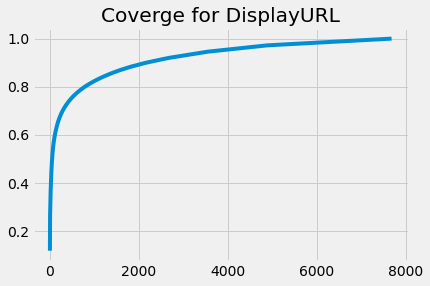

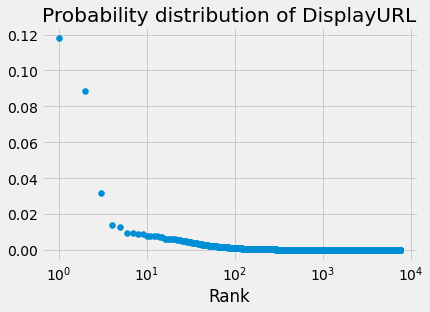

AdId


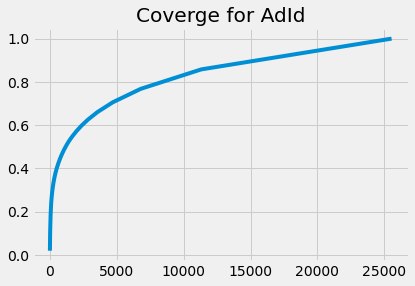

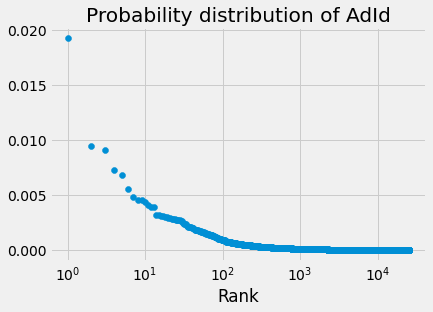

AdvertiserId


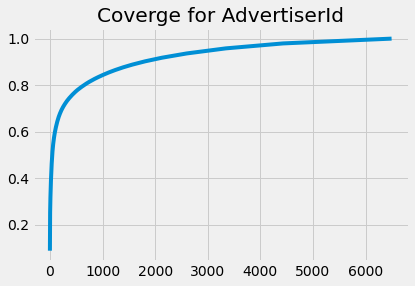

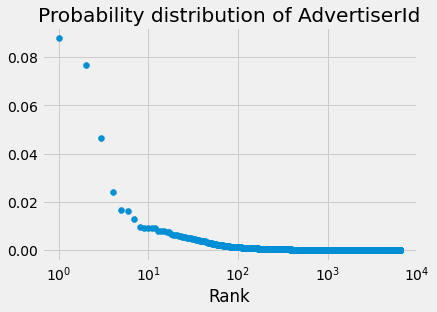

UserID


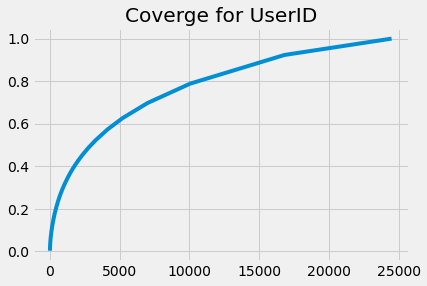

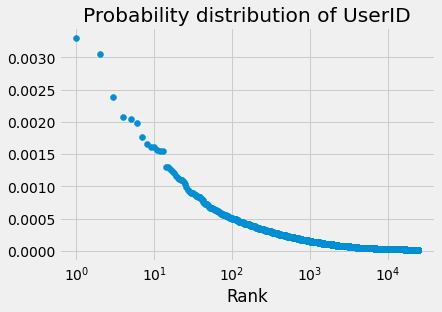

In [21]:
LOGLOG = False

most_covering = []
average_count = []

for col in other_columns:
    print(col)
    all_elements = data[col]
    all_elements_count = [v for k, v in sorted(Counter(all_elements).items(), key=lambda item: item[1], reverse=True)]  # sorted counts of words (biggest first)
    average_count.append(np.mean(all_elements_count))

    coverage = np.cumsum(all_elements_count) / np.sum(all_elements_count)
    plt.plot(coverage)
    plt.title(f"Coverge for {col}")
    plt.show()
    number_of_elements_covering_most = np.argmin([abs(x - 0.9) for x in coverage])
    most_covering.append(number_of_elements_covering_most)

    probs = all_elements_count / np.sum(all_elements_count)

    plt.scatter(np.arange(1, len(probs) + 1), probs)
    plt.xscale("log")
    if LOGLOG:
        plt.yscale("log")
    plt.xlabel("Rank")
    plt.title(f"Probability distribution of {col}")
    plt.show()

In [22]:
other_summary = pd.DataFrame({
    "column": other_columns,
    "number of unique elements": n_unique,
    "average number of samples per unique element": average_count,
    "number of elements covering 90% of all": most_covering
})
other_summary

,column,number of unique elements,average number of samples per unique element,number of elements covering 90% of all
0,DisplayURL,7687,13.008976,2166
1,AdId,25549,3.914048,15548
2,AdvertiserId,6496,15.394089,1763
3,UserID,24496,4.082299,15631
